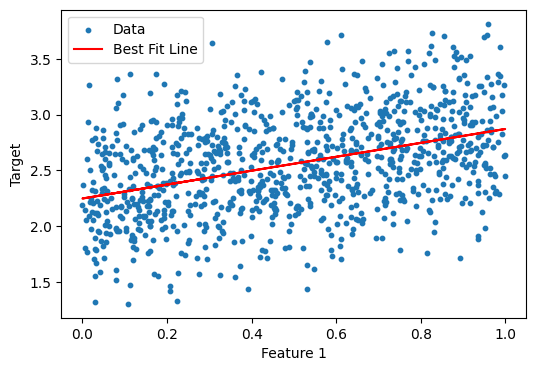

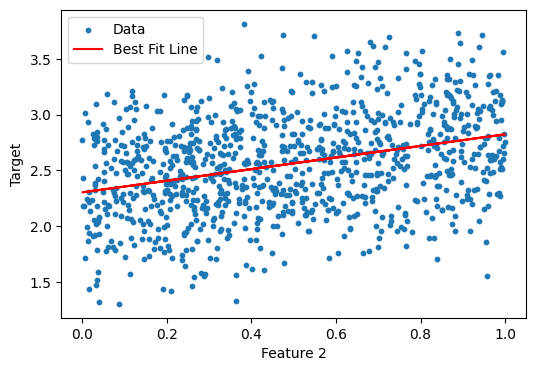

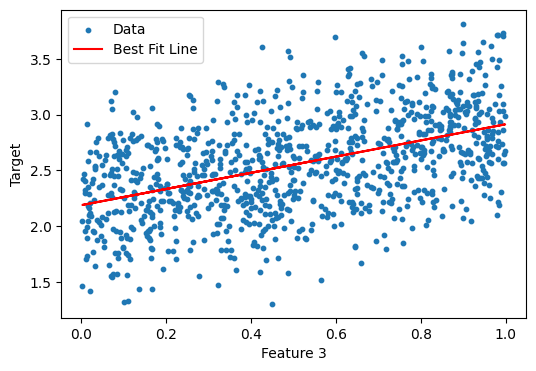

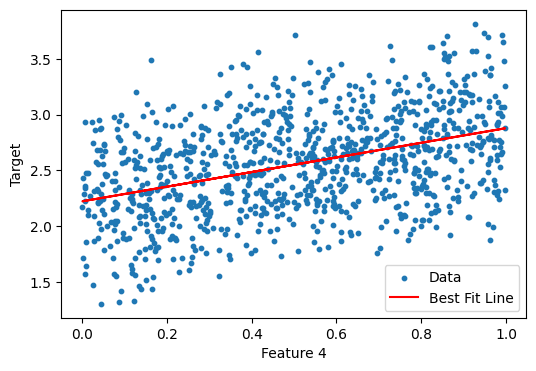

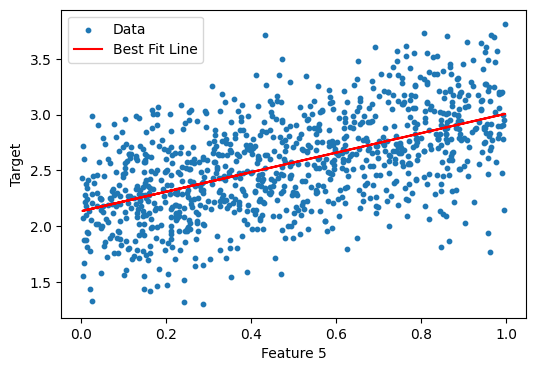

In [20]:
import numpy as np
import matplotlib.pyplot as plot
np.random.seed(34) 

X = np.random.rand(1000, 5)

true_coefficients = np.random.rand(5)
true_intercept = np.random.rand()
y = np.dot(X, true_coefficients) + true_intercept

noise = np.random.normal(0, 0.1, size=1000)
y += noise

for feature_idx in range(5):
    plot.figure(figsize=(6, 4))
    plot.scatter(X[:, feature_idx], y, s=10, label='Data')
    
    # Fit a linear regression line
    coefficients = np.polyfit(Z[:, feature_idx], y, 1)
    fit_line = np.poly1d(coefficients)
    plot.plot(X[:, feature_idx], fit_line(X[:, feature_idx]), color='r', label='Best Fit Line')
    
    plot.xlabel(f'Feature {feature_idx + 1}')
    plot.ylabel('Target')
    plot.legend()
    plot.show()

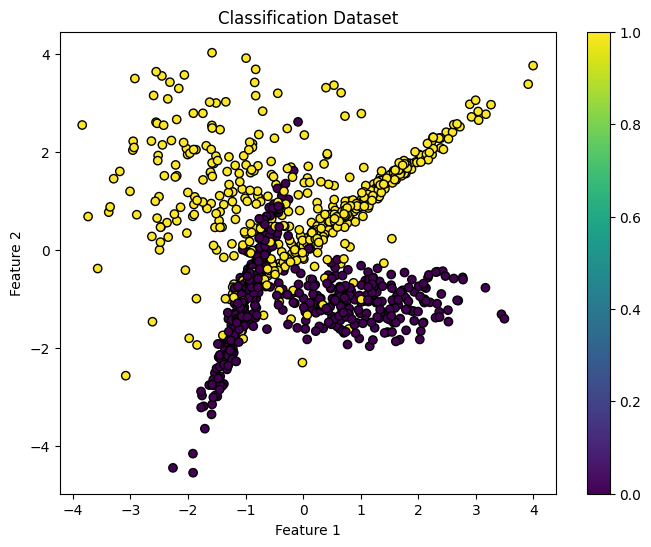

In [21]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.datasets import make_classification
np.random.seed(34) 

X, y = make_classification(
    n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=2, random_state=42
)

plot.figure(figsize=(8, 6))
plot.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plot.xlabel('Feature 1')
plot.ylabel('Feature 2')
plot.title('Classification Dataset')
plot.colorbar()
plot.show()

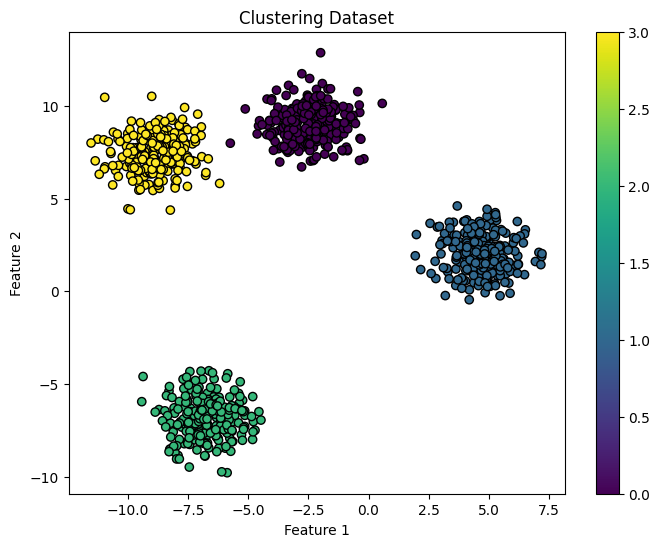

In [22]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.datasets import make_blobs
np.random.seed(34)  

X, y = make_blobs(
    n_samples=1000, n_features=2, centers=4, cluster_std=1.0, random_state=42
)

plot.figure(figsize=(8, 6))
plot.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plot.xlabel('Feature 1')
plot.ylabel('Feature 2')
plot.title('Clustering Dataset')
plot.colorbar()
plot.show()





In [9]:
import requests as rq
url = 'https://www.worldometers.info/coronavirus/'
page = rq.get(url)
print(page.status_code)


200


In [16]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.text, 'lxml')
table = soup.find('table', id = 'main_table_countries_today')

headers = []
first_row=table.find('tr');
for i in first_row.find_all('th'):
 title = i.text 
 headers.append(title)
 print(headers) 

['#']
['#', 'Country,Other']
['#', 'Country,Other', 'TotalCases']
['#', 'Country,Other', 'TotalCases', 'NewCases']
['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths']
['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths']
['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered']
['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered']
['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']
['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical']
['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop']
['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'N

In [19]:
import pandas as pd
mydata = pd.DataFrame(columns = headers)
for j in table.find_all('tr')[1:]:
  row_data = j.find_all('td')
  row = [i.text for i in row_data]
  length = len(mydata)
  mydata.loc[length] = row
mydata.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,\nNorth America\n,"126,649,484",+125,"1,632,558",+8,"122,498,724","+1,197","2,518,202","6,254",...,,,,North America,\n,,,,,
1,,\nAsia\n,"217,322,003","+21,394","1,546,302",+15,"201,037,464","+18,437","14,738,237","15,480",...,,,,Asia,\n,,,,,
2,,\nEurope\n,"249,252,989",,"2,059,646",,"245,207,160","+7,736","1,986,183","5,843",...,,,,Europe,\n,,,,,
3,,\nSouth America\n,"68,674,162",,"1,355,584",,"66,460,570",+47,"858,008","10,123",...,,,,South America,\n,,,,,
4,,\nOceania\n,"14,323,648",,"27,858",,"14,150,432",,"145,358",86,...,,,,Australia/Oceania,\n,,,,,


Class distribution before resampling: Counter({0: 944, 1: 56})


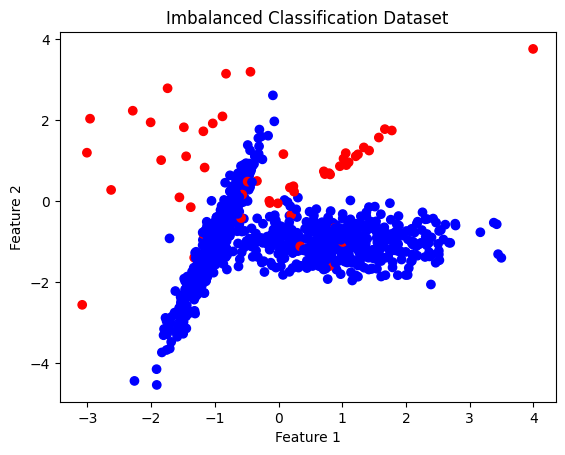

Class distribution after oversampling: Counter({0: 944, 1: 944})


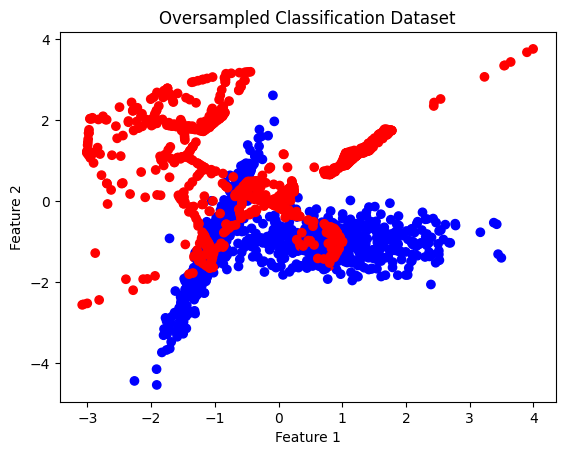

Class distribution after undersampling: Counter({0: 944, 1: 944})


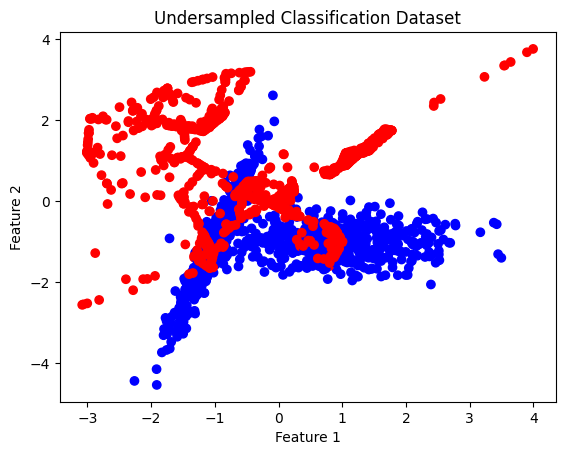

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
np.random.seed(42)
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           weights=[0.95, 0.05], random_state=42)
class_counts = Counter(y)
print("Class distribution before resampling:", class_counts)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Imbalanced Classification Dataset')
plt.show()
oversampler = SMOTE(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)
resampled_class_counts = Counter(y_resampled)
print("Class distribution after oversampling:", resampled_class_counts)
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Oversampled Classification Dataset')
plt.show()

resampled_class_counts = Counter(y_resampled)
print("Class distribution after undersampling:", resampled_class_counts)
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Undersampled Classification Dataset')
plt.show()

In [26]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()

X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)

print(df.head())

print("Missing values in DataFrame:", df.isnull().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set dimensions:", X_train.shape)
print("Testing set dimensions:", X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

df_train_scaled = pd.DataFrame(X_train_scaled, columns=iris.feature_names)
print(df_train_scaled.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Missing values in DataFrame: sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Training set dimensions: (105, 4)
Testing set dimensions: (45, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.413416         -1.462003          -0.099511         -0.323398
1           0.551222         -0.502563           0.717703          0.353032
2           0.671802          0.217016           0.951192          0.758890
3           0.912961         -0.022844  